In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D
from matplotlib import pyplot as plt
import cv2
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   38G   32G  55% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
/dev/sda1        76G   42G   35G  55% /opt/bin/.nvidia
tmpfs           6.4G   28K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [ ]:
from keras.applications.vgg16 import VGG16
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os

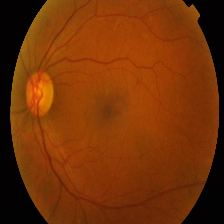

In [ ]:
load_img(os.path.join("/content/gdrive/MyDrive/Diabetes data/output/train/Mild", '00cb6555d108.png'))

In [ ]:
from glob import glob

# Load the data

In [ ]:
#define an image size of 224 by 224
SIZE = 224

train_images = []
train_labels = []

#populate the image and labels to an empty list
for directory_path in glob("/content/gdrive/MyDrive/Diabetes data/output/train/*"):
    label = directory_path.split('\\')[-1]
    print(directory_path)
    print('================')
    print(label)

    for img_path in glob(os.path.join(directory_path, '*.png')):
#         print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)

#convert list to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

/content/gdrive/MyDrive/Diabetes data/output/train/Proliferate_DR
/content/gdrive/MyDrive/Diabetes data/output/train/Proliferate_DR
/content/gdrive/MyDrive/Diabetes data/output/train/Mild
/content/gdrive/MyDrive/Diabetes data/output/train/Mild
/content/gdrive/MyDrive/Diabetes data/output/train/Moderate
/content/gdrive/MyDrive/Diabetes data/output/train/Moderate
/content/gdrive/MyDrive/Diabetes data/output/train/No_DR
/content/gdrive/MyDrive/Diabetes data/output/train/No_DR
/content/gdrive/MyDrive/Diabetes data/output/train/Severe
/content/gdrive/MyDrive/Diabetes data/output/train/Severe


In [ ]:
#perform the same procedure for the test dataset
test_images = []
test_labels = []

for directory_path in glob("/content/gdrive/MyDrive/Diabetes data/output/test/*"):
    label = directory_path.split('\\')[-1]
    print(directory_path)
    print('================')
    print(label)

    for img_path in glob(os.path.join(directory_path, '*.png')):
#         print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

/content/gdrive/MyDrive/Diabetes data/output/test/Mild
/content/gdrive/MyDrive/Diabetes data/output/test/Mild
/content/gdrive/MyDrive/Diabetes data/output/test/No_DR
/content/gdrive/MyDrive/Diabetes data/output/test/No_DR
/content/gdrive/MyDrive/Diabetes data/output/test/Severe
/content/gdrive/MyDrive/Diabetes data/output/test/Severe
/content/gdrive/MyDrive/Diabetes data/output/test/Moderate
/content/gdrive/MyDrive/Diabetes data/output/test/Moderate
/content/gdrive/MyDrive/Diabetes data/output/test/Proliferate_DR
/content/gdrive/MyDrive/Diabetes data/output/test/Proliferate_DR


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical 

#convert to numbers
encoder = LabelEncoder()
encoder.fit(train_labels)
train_labels_encoded = encoder.transform(train_labels)

encoder.fit(test_labels)
test_labels_encoded = encoder.transform(test_labels)

In [ ]:

#rename data for easy indentification
X_train, y_train, X_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

#normalize the image pixels
X_train, X_test = X_train/255.0, X_test/255.0

#one hot encode the labels
train_labels_onehot = to_categorical(train_labels_encoded)

test_labels_onehot = to_categorical(test_labels_encoded)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [ ]:
from tensorflow.keras.applications import InceptionV3, ResNet50, MobileNet, DenseNet201, Xception

# Create the pre-trained and machine learning models

In [ ]:
def create_model(tf_model, ml_algorithm):
  if tf_model == 'vgg16':
    specific_model = VGG16(include_top=False, weights='imagenet',
                  input_shape=(SIZE, SIZE, 3))
  if tf_model == 'inceptionv3':
    specific_model = InceptionV3(include_top=False, weights='imagenet',
                  input_shape=(SIZE, SIZE, 3))
  if tf_model == 'resnet50':
    specific_model = ResNet50(include_top=False, weights='imagenet',
                  input_shape=(SIZE, SIZE, 3))
  if tf_model == 'mobilenet':
    specific_model = MobileNet(include_top=False, weights='imagenet',
                  input_shape=(SIZE, SIZE, 3))
  if tf_model == 'densenet':
    specific_model = DenseNet201(include_top=False, weights='imagenet',
                  input_shape=(SIZE, SIZE, 3))
  if tf_model == 'xception':
    specific_model = Xception(include_top=False, weights='imagenet',
                  input_shape=(SIZE, SIZE, 3))
    
  for layer in specific_model.layers:
    layer.trainable = False

  feature_extractor = specific_model.predict(X_train)

  features = feature_extractor.reshape(feature_extractor.shape[0], -1)

  X_for_ml = features
  if ml_algorithm == 'rf':
    specific_ml = RandomForestClassifier()
  if ml_algorithm == 'svc':
    specific_ml = SVC()
  if ml_algorithm == 'lr':
    specific_ml = LinearRegression()
  if ml_algorithm == 'knn':
    specific_ml = KNeighborsClassifier()
  if ml_algorithm == 'nb':
    specific_ml = GaussianNB()
  
  
  specific_ml.fit(X_for_ml, y_train)

  X_test_ml = specific_model.predict(X_test)
  X_test_features = X_test_ml.reshape(X_test_ml.shape[0], -1)

  ml_pred = specific_ml.predict(X_test_features)

  real_ml_pred = encoder.inverse_transform(ml_pred)

  return(f'Acccracy score of {tf_model} and {ml_algorithm} is', accuracy_score(test_labels, real_ml_pred),
         f'Recall score of {tf_model} and {ml_algorithm} is', recall_score(test_labels, real_ml_pred, average='weighted'),
         f'Precision score of {tf_model} and {ml_algorithm} is', precision_score(test_labels, real_ml_pred, average='weighted'),
         f'F1 score of {tf_model} and {ml_algorithm} is', f1_score(test_labels, real_ml_pred, average='weighted'),
          f'Confusion score of {tf_model} and {ml_algorithm} is', confusion_matrix(test_labels, real_ml_pred))






In [ ]:
create_model('vgg16', 'rf')

('Acccracy score of vgg16 and rf is',
 0.7804878048780488,
 'Recall score of vgg16 and rf is',
 0.7804878048780488,
 'Precision score of vgg16 and rf is',
 0.7505339793646859,
 'F1 score of vgg16 and rf is',
 0.7478297343385617,
 'Confusion score of vgg16 and rf is',
 array([[ 19,  13,   3,   2,   0],
        [  9,  87,   3,   1,   1],
        [  0,   4, 177,   0,   0],
        [  1,  18,   5,   3,   3],
        [  0,  16,   1,   1,   2]]))

# Check VGG with ML algorithms Performance

In [ ]:
create_model('vgg16', 'svc')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('Acccracy score of vgg16 and svc is',
 0.7289972899728997,
 'Recall score of vgg16 and svc is',
 0.7289972899728997,
 'Precision score of vgg16 and svc is',
 0.6296726459328085,
 'F1 score of vgg16 and svc is',
 0.6437079597686292,
 'Confusion score of vgg16 and svc is',
 array([[  0,  33,   4,   0,   0],
        [  0,  89,  12,   0,   0],
        [  0,   2, 179,   0,   0],
        [  0,  22,   8,   0,   0],
        [  0,  15,   4,   0,   1]]))

In [ ]:
create_model('vgg16', 'knn')

('Acccracy score of vgg16 and knn is',
 0.7289972899728997,
 'Recall score of vgg16 and knn is',
 0.7289972899728997,
 'Precision score of vgg16 and knn is',
 0.7031496508122523,
 'F1 score of vgg16 and knn is',
 0.7065881403450726,
 'Confusion score of vgg16 and knn is',
 array([[ 24,   8,   3,   2,   0],
        [ 19,  71,   5,   5,   1],
        [  1,   8, 170,   2,   0],
        [  7,  13,   6,   3,   1],
        [  3,  12,   1,   3,   1]]))

In [ ]:
create_model('vgg16', 'nb')

('Acccracy score of vgg16 and nb is',
 0.6476964769647696,
 'Recall score of vgg16 and nb is',
 0.6476964769647696,
 'Precision score of vgg16 and nb is',
 0.6518997369494564,
 'F1 score of vgg16 and nb is',
 0.6457094698521569,
 'Confusion score of vgg16 and nb is',
 array([[ 22,   5,   4,   5,   1],
        [ 29,  45,   9,  14,   4],
        [  3,  10, 163,   4,   1],
        [  2,  15,   3,   7,   3],
        [  3,  11,   1,   3,   2]]))

# Check ResNet with ML algorithms performance

In [ ]:
create_model('resnet50', 'rf')

('Acccracy score of resnet50 and rf is',
 0.7642276422764228,
 'Recall score of resnet50 and rf is',
 0.7642276422764228,
 'Precision score of resnet50 and rf is',
 0.731971178107838,
 'F1 score of resnet50 and rf is',
 0.7271258035777077,
 'Confusion score of resnet50 and rf is',
 array([[ 17,  16,   3,   1,   0],
        [ 12,  82,   6,   0,   1],
        [  0,   2, 179,   0,   0],
        [  4,  16,   5,   2,   3],
        [  0,  15,   2,   1,   2]]))

In [ ]:
create_model('resnet50', 'svc')

94773248/94765736 [==============================] - 1s 0us/step


('Acccracy score of resnet50 and svc is',
 0.5989159891598916,
 'Recall score of resnet50 and svc is',
 0.5989159891598916,
 'Precision score of resnet50 and svc is',
 0.4543436388140231,
 'F1 score of resnet50 and svc is',
 0.4991451645351041,
 'Confusion score of resnet50 and svc is',
 array([[  0,  13,  24,   0,   0],
        [  0,  41,  60,   0,   0],
        [  0,   1, 180,   0,   0],
        [  0,   9,  21,   0,   0],
        [  0,   7,  13,   0,   0]]))

In [ ]:
create_model('resnet50', 'knn')

('Acccracy score of resnet50 and knn is',
 0.7208672086720868,
 'Recall score of resnet50 and knn is',
 0.7208672086720868,
 'Precision score of resnet50 and knn is',
 0.7193280056230115,
 'F1 score of resnet50 and knn is',
 0.6962607392503223,
 'Confusion score of resnet50 and knn is',
 array([[ 18,  15,   3,   0,   1],
        [ 22,  73,   5,   1,   0],
        [  1,  10, 170,   0,   0],
        [  5,  17,   5,   2,   1],
        [  3,  11,   2,   1,   3]]))

In [ ]:
create_model('resnet50', 'nb')

('Acccracy score of resnet50 and nb is',
 0.2682926829268293,
 'Recall score of resnet50 and nb is',
 0.2682926829268293,
 'Precision score of resnet50 and nb is',
 0.510901257881613,
 'F1 score of resnet50 and nb is',
 0.3130727512233344,
 'Confusion score of resnet50 and nb is',
 array([[ 2,  0,  1, 32,  2],
        [ 6,  5,  2, 82,  6],
        [50, 18, 69, 35,  9],
        [ 0,  6,  3, 19,  2],
        [ 0,  2,  1, 13,  4]]))

## Check XceptionNet with ML algorithms performance

In [ ]:
create_model('xception', 'rf')

83689472/83683744 [==============================] - 3s 0us/step


('Acccracy score of xception and rf is',
 0.7533875338753387,
 'Recall score of xception and rf is',
 0.7533875338753387,
 'Precision score of xception and rf is',
 0.7264315264997576,
 'F1 score of xception and rf is',
 0.7026756848128791,
 'Confusion score of xception and rf is',
 array([[  8,  27,   2,   0,   0],
        [  3,  91,   5,   1,   1],
        [  0,   4, 177,   0,   0],
        [  0,  23,   3,   1,   3],
        [  0,  17,   1,   1,   1]]))

In [ ]:
%time create_model('xception', 'svc')

In [ ]:
create_model('xception', 'knn')

('Acccracy score of xception and knn is',
 0.7560975609756098,
 'Recall score of xception and knn is',
 0.7560975609756098,
 'Precision score of xception and knn is',
 0.7482903199024133,
 'F1 score of xception and knn is',
 0.7180726595047418,
 'Confusion score of xception and knn is',
 array([[ 18,  15,   4,   0,   0],
        [ 13,  82,   4,   2,   0],
        [  2,   3, 176,   0,   0],
        [  6,  19,   4,   1,   0],
        [  1,  15,   2,   0,   2]]))

In [ ]:
%time create_model('xception', 'nb')

CPU times: user 40.4 s, sys: 3.75 s, total: 44.2 s
Wall time: 1min 40s


('Acccracy score of xception and nb is',
 0.5880758807588076,
 'Recall score of xception and nb is',
 0.5880758807588076,
 'Precision score of xception and nb is',
 0.5997199008607349,
 'F1 score of xception and nb is',
 0.5925369245107559,
 'Confusion score of xception and nb is',
 array([[  9,  20,   5,   2,   1],
        [ 18,  48,   9,  21,   5],
        [ 12,  16, 153,   0,   0],
        [  3,  16,   4,   4,   3],
        [  1,  11,   1,   4,   3]]))

# Check InceptionV3 with ML algorithms performance

In [ ]:
create_model('inceptionv3', 'rf')

87916544/87910968 [==============================] - 3s 0us/step


('Acccracy score of inceptionv3 and rf is',
 0.7479674796747967,
 'Recall score of inceptionv3 and rf is',
 0.7479674796747967,
 'Precision score of inceptionv3 and rf is',
 0.7599954087363981,
 'F1 score of inceptionv3 and rf is',
 0.6824648571682881,
 'Confusion score of inceptionv3 and rf is',
 array([[  3,  29,   5,   0,   0],
        [  0,  95,   5,   0,   1],
        [  0,   5, 176,   0,   0],
        [  0,  22,   4,   1,   3],
        [  0,  18,   0,   1,   1]]))

In [ ]:
create_model('inceptionv3', 'svc')

('Acccracy score of inceptionv3 and svc is',
 0.7804878048780488,
 'Recall score of inceptionv3 and svc is',
 0.7804878048780488,
 'Precision score of inceptionv3 and svc is',
 0.787779068266873,
 'F1 score of inceptionv3 and svc is',
 0.7346355022449522,
 'Confusion score of inceptionv3 and svc is',
 array([[ 14,  21,   2,   0,   0],
        [  1,  97,   3,   0,   0],
        [  0,   6, 175,   0,   0],
        [  1,  26,   1,   1,   1],
        [  0,  18,   0,   1,   1]]))

In [ ]:
create_model('inceptionv3', 'knn')

('Acccracy score of inceptionv3 and knn is',
 0.6991869918699187,
 'Recall score of inceptionv3 and knn is',
 0.6991869918699187,
 'Precision score of inceptionv3 and knn is',
 0.6768469985685587,
 'F1 score of inceptionv3 and knn is',
 0.675241390548271,
 'Confusion score of inceptionv3 and knn is',
 array([[ 16,  15,   5,   1,   0],
        [ 23,  64,  10,   3,   1],
        [  4,   3, 174,   0,   0],
        [  6,  19,   1,   3,   1],
        [  2,  15,   0,   2,   1]]))

In [ ]:
create_model('inceptionv3', 'nb')

('Acccracy score of inceptionv3 and nb is',
 0.6504065040650406,
 'Recall score of inceptionv3 and nb is',
 0.6504065040650406,
 'Precision score of inceptionv3 and nb is',
 0.6897128930580256,
 'F1 score of inceptionv3 and nb is',
 0.663805970525623,
 'Confusion score of inceptionv3 and nb is',
 array([[ 25,   6,   2,   2,   2],
        [ 20,  55,   2,  16,   8],
        [ 10,  22, 148,   1,   0],
        [  5,  12,   2,   8,   3],
        [  1,   9,   0,   6,   4]]))

In [ ]:
for i in ['vgg16, inceptionv3', 'resnet50', 'mobilenet', 'densenet', 'xception']:
  for j in ['rf', 'svc', 'knn', 'lr', 'nb']:
    try:
      create_model(i, j)
      print('=================================')
      print()
    
    except Exception as e:
      print(e)

local variable 'specific_model' referenced before assignment
local variable 'specific_model' referenced before assignment
local variable 'specific_model' referenced before assignment
local variable 'specific_model' referenced before assignment
local variable 'specific_model' referenced before assignment



# Check MobileNet with ML algorithms performance

In [ ]:
create_model('mobilenet', 'rf')

17227776/17225924 [==============================] - 1s 0us/step


('Acccracy score of mobilenet and rf is',
 0.7831978319783198,
 'Recall score of mobilenet and rf is',
 0.7831978319783198,
 'Precision score of mobilenet and rf is',
 0.7769699268829279,
 'F1 score of mobilenet and rf is',
 0.739642611211657,
 'Confusion score of mobilenet and rf is',
 array([[ 14,  20,   3,   0,   0],
        [  2,  94,   4,   0,   1],
        [  0,   3, 178,   0,   0],
        [  1,  21,   3,   2,   3],
        [  0,  18,   0,   1,   1]]))

In [ ]:
create_model('mobilenet', 'svc')

('Acccracy score of mobilenet and svc is',
 0.7831978319783198,
 'Recall score of mobilenet and svc is',
 0.7831978319783198,
 'Precision score of mobilenet and svc is',
 0.7863005377962978,
 'F1 score of mobilenet and svc is',
 0.7441585098243783,
 'Confusion score of mobilenet and svc is',
 array([[ 17,  17,   3,   0,   0],
        [  7,  91,   3,   0,   0],
        [  2,   2, 177,   0,   0],
        [  1,  23,   3,   2,   1],
        [  0,  17,   0,   1,   2]]))

In [ ]:
create_model('mobilenet', 'knn')

('Acccracy score of mobilenet and knn is',
 0.7425474254742548,
 'Recall score of mobilenet and knn is',
 0.7425474254742548,
 'Precision score of mobilenet and knn is',
 0.7025530856526171,
 'F1 score of mobilenet and knn is',
 0.7102121288466547,
 'Confusion score of mobilenet and knn is',
 array([[ 23,  11,   2,   0,   1],
        [ 22,  72,   4,   3,   0],
        [  2,   2, 177,   0,   0],
        [  3,  21,   4,   1,   1],
        [  3,  13,   1,   2,   1]]))

In [ ]:
create_model('mobilenet', 'nb')

('Acccracy score of mobilenet and nb is',
 0.7018970189701897,
 'Recall score of mobilenet and nb is',
 0.7018970189701897,
 'Precision score of mobilenet and nb is',
 0.6908068296642998,
 'F1 score of mobilenet and nb is',
 0.6721765357054937,
 'Confusion score of mobilenet and nb is',
 array([[  4,  27,   2,   4,   0],
        [  3,  86,   5,   6,   1],
        [  3,  16, 161,   1,   0],
        [  0,  18,   4,   5,   3],
        [  0,  16,   0,   1,   3]]))

# Check DenseNet with ML alorithms performance

In [ ]:
create_model('densenet', 'rf')

74842112/74836368 [==============================] - 2s 0us/step


('Acccracy score of densenet and rf is',
 0.7777777777777778,
 'Recall score of densenet and rf is',
 0.7777777777777778,
 'Precision score of densenet and rf is',
 0.7465813993180651,
 'F1 score of densenet and rf is',
 0.7444729483049927,
 'Confusion score of densenet and rf is',
 array([[ 16,  16,   3,   2,   0],
        [  9,  87,   3,   1,   1],
        [  1,   1, 179,   0,   0],
        [  3,  18,   3,   3,   3],
        [  0,  17,   0,   1,   2]]))

In [ ]:
create_model('densenet', 'svc')

In [ ]:
create_model('densenet', 'knn')

('Acccracy score of densenet and knn is',
 0.7425474254742548,
 'Recall score of densenet and knn is',
 0.7425474254742548,
 'Precision score of densenet and knn is',
 0.7208863606711565,
 'F1 score of densenet and knn is',
 0.7178597308599158,
 'Confusion score of densenet and knn is',
 array([[ 19,  15,   3,   0,   0],
        [ 20,  71,   4,   3,   3],
        [  1,   2, 178,   0,   0],
        [  7,  15,   4,   3,   1],
        [  0,  13,   3,   1,   3]]))

In [ ]:
create_model('densenet', 'nb')

('Acccracy score of densenet and nb is',
 0.6612466124661247,
 'Recall score of densenet and nb is',
 0.6612466124661247,
 'Precision score of densenet and nb is',
 0.6986123079599478,
 'F1 score of densenet and nb is',
 0.6727113261411953,
 'Confusion score of densenet and nb is',
 array([[ 26,   5,   0,   6,   0],
        [ 24,  58,   3,  11,   5],
        [  7,  23, 146,   3,   2],
        [  4,  11,   2,  10,   3],
        [  1,  10,   2,   3,   4]]))

# Hyperparamters Tuning for MobileNet and SVC

In [ ]:
mobilenet_model = MobileNet(include_top=False, weights='imagenet',
                  input_shape=(SIZE, SIZE, 3))

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
for layer in mobilenet_model.layers:
  layer.trainable = False

In [ ]:
feature_extractor = mobilenet_model.predict(X_train)

In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
X_for_svc = features

svc = SVC()
svc.fit(X_for_svc, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test_svc = mobilenet_model.predict(X_test)
X_test_features = X_test_svc.reshape(X_test_svc.shape[0], -1)

In [ ]:
svc_pred = svc.predict(X_test_features)

In [ ]:
real_svc_pred = encoder.inverse_transform(svc_pred)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
print('Acccracy score of model is', accuracy_score(test_labels, real_svc_pred))
print(classification_report(test_labels, real_svc_pred))

Acccracy score of model is 0.7831978319783198
                                                                  precision    recall  f1-score   support

          /content/gdrive/MyDrive/Diabetes data/output/test/Mild       0.63      0.46      0.53        37
      /content/gdrive/MyDrive/Diabetes data/output/test/Moderate       0.61      0.90      0.73       101
         /content/gdrive/MyDrive/Diabetes data/output/test/No_DR       0.95      0.98      0.96       181
/content/gdrive/MyDrive/Diabetes data/output/test/Proliferate_DR       0.67      0.07      0.12        30
        /content/gdrive/MyDrive/Diabetes data/output/test/Severe       0.67      0.10      0.17        20

                                                        accuracy                           0.78       369
                                                       macro avg       0.70      0.50      0.50       369
                                                    weighted avg       0.79      0.78      0.74       36

In [ ]:

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# Apply RandomizedSearchCV with the defined paramters
model_search = RandomizedSearchCV(svc, param_distributions=param_grid, scoring='accuracy')
%time model_search.fit(X_for_svc, y_train)


y_pred_op = model_search.predict(X_test_features)
real_svc_pred_op = encoder.inverse_transform(y_pred_op)
# Check metrics
print('Acccracy score of model is', accuracy_score(test_labels, real_svc_pred_op))
print('Recall score of model is', recall_score(test_labels, real_svc_pred_op))
print('Precision score of model is', precision_score(test_labels, real_svc_pred_op))
print('Classifcation score of model is', classification_report(test_labels, real_svc_pred_op))
print(model_search.best_estimator_)
# Print the best combination

In [ ]:
auc_score = roc_auc_score(test_labels, real_svc_pred_op)
print(auc_score)